In [1]:
from make_card_csv import add_card_list_to_csv, get_card_urls_from_pages

In [2]:
url_list = get_card_urls_from_pages(start_page=1, end_page=215)

🔍 ページ 1 を取得中...
URL: https://dm.takaratomy.co.jp/card/?v=%7B"suggest":"on","keyword_type":["card_name","card_ruby","card_text"],"culture_cond":["%E5%8D%98%E8%89%B2","%E5%A4%9A%E8%89%B2"],"pagenum":"1","sort":"release_new"%7D
🔍 ページ 2 を取得中...
URL: https://dm.takaratomy.co.jp/card/?v=%7B"suggest":"on","keyword_type":["card_name","card_ruby","card_text"],"culture_cond":["%E5%8D%98%E8%89%B2","%E5%A4%9A%E8%89%B2"],"pagenum":"2","sort":"release_new"%7D
🔍 ページ 3 を取得中...
URL: https://dm.takaratomy.co.jp/card/?v=%7B"suggest":"on","keyword_type":["card_name","card_ruby","card_text"],"culture_cond":["%E5%8D%98%E8%89%B2","%E5%A4%9A%E8%89%B2"],"pagenum":"3","sort":"release_new"%7D
🔍 ページ 4 を取得中...
URL: https://dm.takaratomy.co.jp/card/?v=%7B"suggest":"on","keyword_type":["card_name","card_ruby","card_text"],"culture_cond":["%E5%8D%98%E8%89%B2","%E5%A4%9A%E8%89%B2"],"pagenum":"4","sort":"release_new"%7D
🔍 ページ 5 を取得中...
URL: https://dm.takaratomy.co.jp/card/?v=%7B"suggest":"on","keyword_type":["card_nam

In [3]:
add_card_list_to_csv(url_list)

🔄 1/10719: https://dm.takaratomy.co.jp/card/detail/?id=dm25sp1-002
card_data_list [{'カード名_1': '五番龍 レイクポーチャー ParZero', 'カードの種類_1': 'クリーチャー', '文明_1': '水', 'レアリティ_1': 'SR', 'パワー_1': '8000', 'コスト_1': '5', 'マナ_1': '1', '種族_1': 'ジャイアント・ドラゴン', 'イラストレーター_1': 'Norikatsu Miyoshi/Hisashi Momose', '特殊能力_1': 'ブロッカー ジャストダイバー W・ブレイカー このクリーチャーが出た時、自分の山札の上から６枚を見る。その中の２枚を手札に加え、残りを好きな順序で山札の下に置く。その後、自分の手札を１枚、表向きにしてもよい。そうしたら、その表向きにしたカードと同じコストの相手のクリーチャーを１体選び、持ち主の手札に戻す。', 'フレーバー_1': ''}]
✅ 追加完了: None → duelmasters_cards.csv
🔄 2/10719: https://dm.takaratomy.co.jp/card/detail/?id=dm25sp1-003
card_data_list [{'カード名_1': '天命龍装 ホーリーエンド / ナウ・オア・ネバー', 'カードの種類_1': 'クリーチャー', '文明_1': '光', 'レアリティ_1': 'SR', 'パワー_1': '9500', 'コスト_1': '7', 'マナ_1': '1', '種族_1': 'ドラゴンギルド/メタリカ', 'イラストレーター_1': 'Shishizaru/KISUKE', '特殊能力_1': 'ブロッカー W・ブレイカー このクリーチャーが出た時、相手のクリーチャーをすべてタップする。その後、カードを１枚引く。', 'フレーバー_1': '', 'カード名_2': '天命龍装 ホーリーエンド / ナウ・オア・ネバー', 'カードの種類_2': '呪文', '文明_2': '水', 'レアリティ_2': 'SR', 'パワー_2': '9500', 'コスト_2': '5', 'マナ_2': '1'

In [ ]:
# csvからembeddingを作成する
from rag_card_search import (
    save_index_and_texts,
    load_card_texts_from_csv,
    create_faiss_index,
)

texts = load_card_texts_from_csv("card_data/duelmasters_cards.csv")
index, texts, _ = create_faiss_index(texts)
save_index_and_texts(index, texts)

KeyboardInterrupt: 

In [ ]:
# textsの中から特定の列を削除する
import pickle
def remove_columns_from_texts(texts, columns_to_remove):
    """
    texts: "列名: 値 | 列名: 値 | ..." の形式のリスト
    columns_to_remove: 削除したい列名のリスト（例: ["レアリティ_1", "イラストレーター_1"]）
    """
    filtered_texts = []

    for text in texts:
        parts = text.split(" | ")
        new_parts = []
        for part in parts:
            if ": " in part:
                key, _ = part.split(": ", 1)
                if key.strip() not in columns_to_remove:
                    new_parts.append(part)
        filtered_texts.append(" | ".join(new_parts))

    return filtered_texts

columns_to_remove = ["フレーバー_1", "フレーバー_2"]
filtered_texts = remove_columns_from_texts(texts, columns_to_remove)
with open("card_data/duelmasters_cards.texts", "wb") as f:
    pickle.dump(filtered_texts, f)

# 新弾が出たら追加

In [ ]:
# 新しいカードを追加
from make_card_csv import get_card_urls_from_pages, add_card_list_to_csv, merge_and_replace_cards
from rag_card_search import append_cards_to_index

products = "25rp1" # ここに追加したいカードパックの名前を指定。調べ方は、カード検索のurlのproductの部分を確認する。
existing_csv = "card_data/duelmasters_cards.csv" # 既存のカードリストのcsvファイル名。一番新しいのに更新してください。
urls = get_card_urls_from_pages(products=products)
add_card_list_to_csv(urls, csv_path="card_data/new_duelmasters_cards.csv")
merge_and_replace_cards(new_csv="card_data/new_duelmasters_cards.csv", existing_csv=existing_csv)
append_cards_to_index("card_data/new_cards_only.csv")

ページ 1 を取得中...
URL: https://dm.takaratomy.co.jp/card/?v=%7B"suggest":"on","keyword_type":["card_name","card_ruby","card_text"],"culture_cond":["%E5%8D%98%E8%89%B2","%E5%A4%9A%E8%89%B2"],"pagenum":"1","sort":"release_new","products":"25rp1"%7D
ページ 2 を取得中...
URL: https://dm.takaratomy.co.jp/card/?v=%7B"suggest":"on","keyword_type":["card_name","card_ruby","card_text"],"culture_cond":["%E5%8D%98%E8%89%B2","%E5%A4%9A%E8%89%B2"],"pagenum":"2","sort":"release_new","products":"25rp1"%7D
ページ 3 を取得中...
URL: https://dm.takaratomy.co.jp/card/?v=%7B"suggest":"on","keyword_type":["card_name","card_ruby","card_text"],"culture_cond":["%E5%8D%98%E8%89%B2","%E5%A4%9A%E8%89%B2"],"pagenum":"3","sort":"release_new","products":"25rp1"%7D
ページ 4 を取得中...
URL: https://dm.takaratomy.co.jp/card/?v=%7B"suggest":"on","keyword_type":["card_name","card_ruby","card_text"],"culture_cond":["%E5%8D%98%E8%89%B2","%E5%A4%9A%E8%89%B2"],"pagenum":"4","sort":"release_new","products":"25rp1"%7D
[警告] カードが見つかりません（ページ 4）
1/119: h

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

# 検索

In [1]:
# ルールベースでフィルタリング
from filter import apply_all_filters

# テンプレート
# my_filter = lambda df: apply_all_filters(
#     df,
#     include_ability_and=None,
#     include_ability_or=None,
#     exclude_ability_and=None,
#     exclude_ability_or=None,
#     civ_include=None,
#     civ_exclude=None,
#     min_cost=None,
#     max_cost=None,
#     race_keywords=None,
# )

my_filter = lambda df: apply_all_filters(
    df,
    include_ability_and=None,
    include_ability_or=None,
    exclude_ability_and=None,
    exclude_ability_or=None,
    civ_include=None,
    civ_exclude=None,
    min_cost=None,
    max_cost=5,
    race_keywords=None,
)

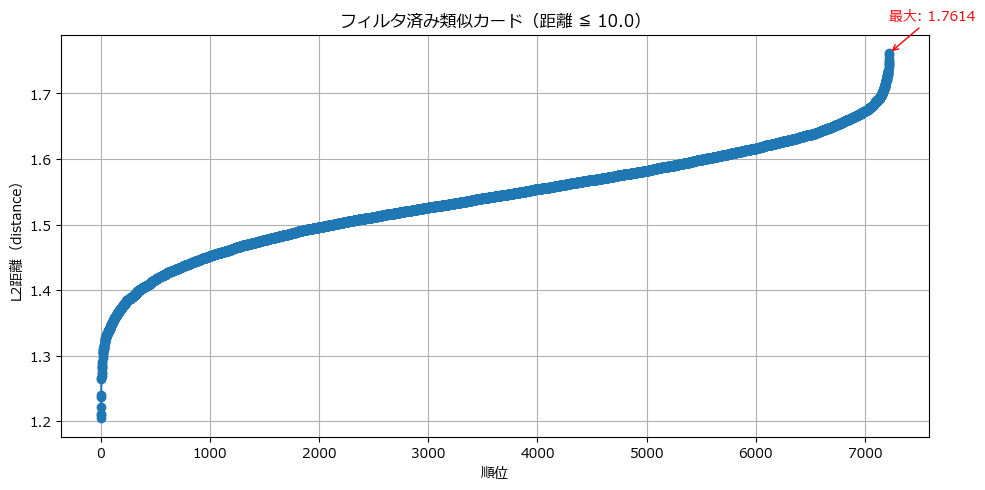

最大距離は 1.7614（7223 番目）
類似カード 7223 件を保存しました: card_data/retrieved_cards.txt


In [2]:
# プロンプトとの類似度グラフを出力
from rag_card_search import search_similar_cards, load_index_and_texts

search_query = "コスト 少ない マナ 出す"
index, texts = load_index_and_texts()
retrieved_contexts = search_similar_cards(
    query=search_query,
    index=index,
    texts=texts,
    top_k=20000,
    max_distance_threshold=10.0,
    filter_func=my_filter,
)

In [ ]:
from rag_card_search import generate_answer_from_context

prompt = ("3ターン目にコスト5のクリーチャーを出せることができるカードを教えてください。"
          "コストを2下げるカードだったり、マナを二つブーストするカードだったり、コスト5のクリーチャーを出せるカードだったり、"
          "そのほかにもいろいろあると思います"
          "ただ、基本、3ターン目に使えるカードはコスト3までです。"
          "コスト3以下でコスト5のクリーチャーを出せるカードとか、2ターン目にマナを二つブーストして3ターン目にコスト5のクリーチャーを出せるカードとか、"
          "じゃないといけません。コスト5以下のクリーチャーを出すために、3ターン目にコストが5よりも高いカードは当然使えません。"
          "マナブーストするカードは、前のターンにマナブーストしておかないと、マナがタップしているので、3ターン目に使えません。"
          "例えば、3ターン目に3コストのマナブーストカードを使って合計5マナに到達しても、3マナすでにタップしているので、"
          "3ターン目にコスト5のクリーチャーを出すことはできません。"
)
start = 800
end = 900
context = "\n".join(retrieved_contexts[start:end])

answer = generate_answer_from_context(prompt, context)
print(answer)

回答を保存しました: answers\20250418_013000_3ターン目コスト5出す方法.txt
3ターン目にコスト5のクリーチャーを出すには、主に次のような方法が考えられます。

- **クリーチャーのコストを大幅に下げる（2減少以上）効果のカード（コスト3以下で起動できる）**
- **2ターン目に2マナブーストして、3ターン目の開始時点で5マナある状態にするカード**
- **3ターン目（つまり3マナの時）に自分の手札のコスト5以下のクリーチャーを場に出せるカード**

あなたのカードリストから、該当するカードを抜粋し、理由も簡単に添えます。

---

### 1. コストを２少なくする効果

#### 獣軍隊 パンチョウ
- コスト：5
- 能力：「このクリーチャーを召喚する時、自分の手札にある進化クリーチャーを１体、相手に見せてもよい。そうしたら、このクリーチャーの召喚コストを２少なくする。ただし、コストは０以下にならない。」
- ⇒ 進化クリーチャーを見せれば、実質コスト3で出せる。3ターン目に出せる。

#### 侵略者 ノイバウテン
- コスト：5
- 能力：「このクリーチャーを召喚する時、自分の手札から進化クリーチャーを１体相手に見せてもよい。そうしたら、このクリーチャーの召喚コストを２少なくする。ただし、コストは０以下にならない。」
- ⇒ 条件が同じで実質コスト3で出せる。3ターン目に出せる。

---

### 2. 手札からコスト5以下のクリーチャーを出す能力

該当カードなし  
（コスト3以下で手札からコスト5クリーチャーを直接場に出す呪文や能力は今回のリストにはありません）

---

### 3. 2ターン目に2マナブーストして3ターン目に5マナにする

これを満たすカード（コスト2以下・マナを2枚ブーストするもの）はリスト内にはありません。
- 「セブンス・タワー」などは1枚（または特定条件で3枚）ですが、コスト3なので2ターン目に使えません。
- タマシードの「バライフの地版」もコスト4で2ターン目に使えません。
- 「暖氷妖精カオルン」も2ターン目に出せますが、ブーストはターンエンドなので、即5マナには到達しません。

---

## 結論

3ターン目にコスト5のクリーチャーを出せるカードは、以下の2枚です（進化ク

In [13]:
from rag_card_search import generate_answer_from_context

prompt = ("3ターン目にコスト5のクリーチャーを出せることができるカードを教えてください。"
          "コストを2下げるカードだったり、マナを二つブーストするカードだったり、コスト5のクリーチャーを出せるカードだったり、"
          "そのほかにもいろいろあると思います"
          "ただ、基本、3ターン目に使えるカードはコスト3までです。"
          "コスト3以下でコスト5のクリーチャーを出せるカードとか、2ターン目にマナを二つブーストして3ターン目にコスト5のクリーチャーを出せるカードとか、"
          "じゃないといけません。コスト5以下のクリーチャーを出すために、3ターン目にコストが5よりも高いカードは当然使えません。"
          "マナブーストするカードは、前のターンにマナブーストしておかないと、マナがタップしているので、3ターン目に使えません。"
          "例えば、3ターン目に3コストのマナブーストカードを使って合計5マナに到達しても、3マナすでにタップしているので、"
          "3ターン目にコスト5のクリーチャーを出すことはできません。"
)
start = 900
end = 1000
context = "\n".join(retrieved_contexts[start:end])

answer = generate_answer_from_context(prompt, context)
print(answer)

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}